In [108]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
import netCDF4 as nc
from mpl_toolkits.basemap import Basemap
import csv
import os
from tqdm import tqdm
import datetime
import collections
from matplotlib.animation import FuncAnimation, PillowWriter 

In [2]:
directory = 'AQUA_MODIS_monthly/Processed/'

In [10]:
data_dict = {}

for filename in tqdm(os.listdir(directory)):
    path_ = os.path.join(directory, filename)
    with open(path_, 'r') as f:
        file = list(csv.reader(f, delimiter=","))
    data_ = np.array(file, dtype=np.float)
    
    data_dict[filename] = data_

100%|██████████| 205/205 [00:03<00:00, 58.73it/s]


In [118]:
data_dict

{'y02m02.csv': array([[  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        ...,
        [0.114, 0.055, 0.067, ...,   nan,   nan,   nan],
        [0.071, 0.071, 0.075, ...,   nan,   nan,   nan],
        [0.102, 0.102, 0.102, ...,   nan,   nan,   nan]]),
 'y02m03.csv': array([[  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        ...,
        [0.114, 0.055, 0.067, ...,   nan,   nan,   nan],
        [0.071, 0.071, 0.075, ...,   nan,   nan,   nan],
        [0.102, 0.102, 0.102, ...,   nan,   nan,   nan]]),
 'y02m04.csv': array([[  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        ...,
        [0.114, 0.055, 0.067, ...,   nan,   nan,   nan],
   

In [73]:
def convert_to_time(string): 
    year = '20'+string[1:3]
    month = string[4:6]
    time_ = datetime.datetime(int(year), int(month), 1)
    return time_

In [75]:
AOD_dict = {}
key_list = []
AOD_list = []

for key in data_dict.keys():
    time_ = convert_to_time(key)
    AOD_sum = np.nansum(data_dict[key])/np.count_nonzero(~np.isnan(data_dict[key]))
    AOD_dict[time_] = AOD_sum
    
    key_list.append(time_)
    AOD_list.append(AOD_sum)


In [90]:
lists = sorted(AOD_dict.items())
x, y = zip(*lists)

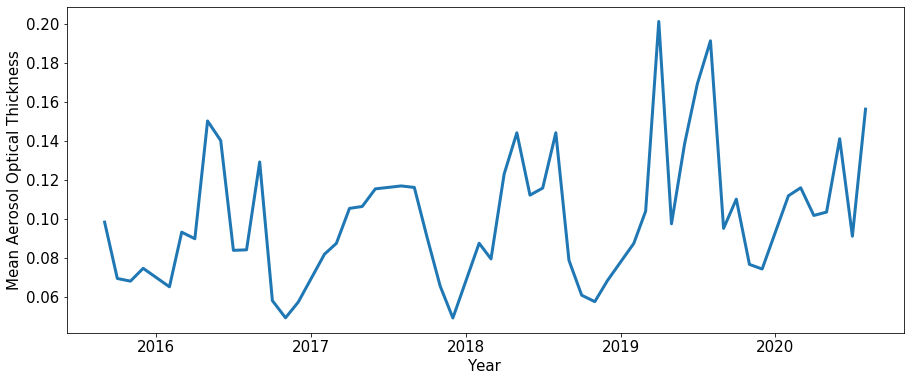

In [104]:
plt.figure(figsize=(15, 6))
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Mean Aerosol Optical Thickness', fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(x[150:],y[150:], linewidth=3)

### Create Gif

#### Copy dictionary and organize by time

In [137]:
copy_dict = {}

for key in data_dict.keys():
    time_ = convert_to_time(key)
    copy_dict[time_] = data_dict[key]

In [140]:
org_lists = sorted(copy_dict.items())
org_x, org_y = zip(*org_lists)

#### UK Latitudes, Longitudes

In [141]:
lon_0 = -11
lon_1 = 2
lat_0 = 50
lat_1 = 59

#### Define Coordinates with respect to these images

In [142]:
x0 = 1800 + lon_0*10
x1 = 1800 + lon_1*10
y0 = 900 - lat_1*10
y1 = 900 - lat_0*10

In [143]:
lons_uk = np.arange(lon_0, lon_1, 0.1)
lats_uk = np.arange(lat_0, lat_1, 0.1)
lats_uk = lats_uk[::-1]

lon_uk, lat_uk = np.meshgrid(lons_uk, lats_uk)

In [249]:
def update(index):  
    m = Basemap(llcrnrlat=lat_0, urcrnrlat=lat_1, llcrnrlon=lon_0, urcrnrlon=lon_1)
    xi, yi = m(lon_uk, lat_uk)
    my_cmap = plt.get_cmap('coolwarm')
    
    cs = m.pcolor(xi, yi, org_y[index], cmap = my_cmap)

    # Add Grid Lines
    m.drawparallels(np.arange(-80., 81., 40.), labels=[1,0,0,0], fontsize=30);
    m.drawmeridians(np.arange(-180., 181., 40.), labels=[0,0,0,1], fontsize=30);

    m.drawcoastlines()
    m.drawcountries()

    cbar = m.colorbar(cs, location='bottom', pad="10%")
    #cbar.ax.tick_params(labelsize=30)
    #cbar.set_label('count', fontsize=20)
    
    plt.text(-2,58.5,org_x[index], fontsize = 8)
    
    plt.show()

In [253]:
ani = FuncAnimation(update, range(190, 205))  
plt.show() 

AttributeError: 'function' object has no attribute 'canvas'

In [251]:
fig

<Figure size 432x288 with 0 Axes>

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


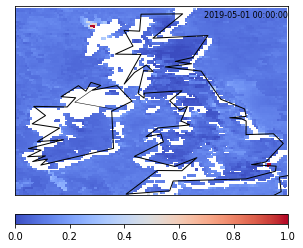

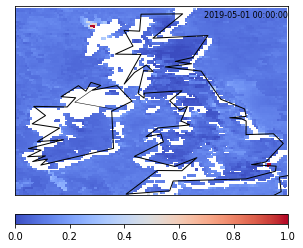

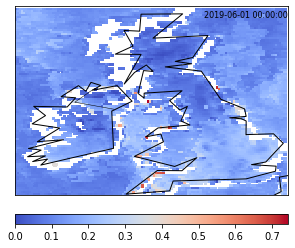

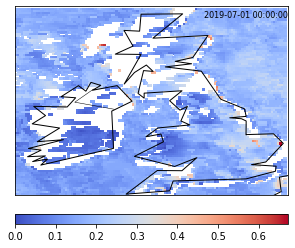

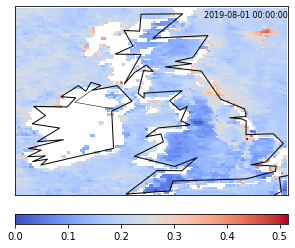

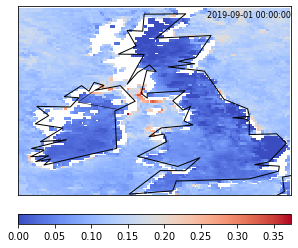

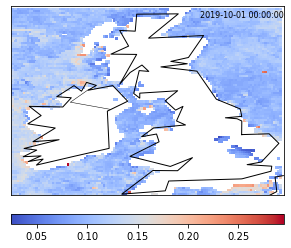

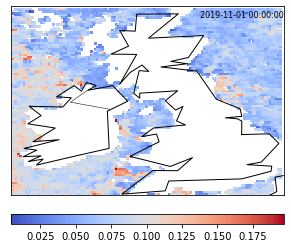

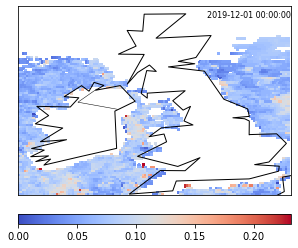

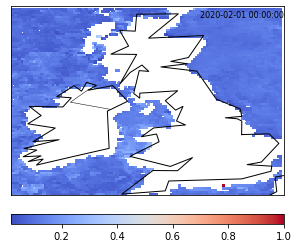

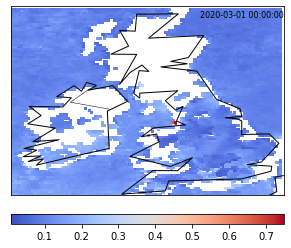

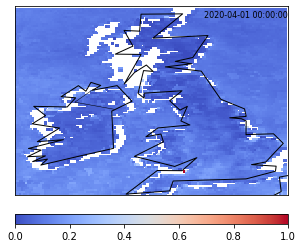

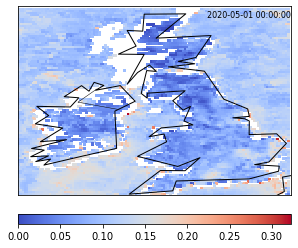

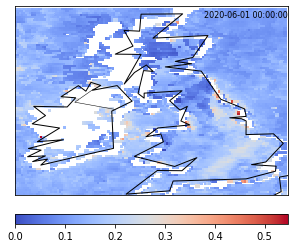

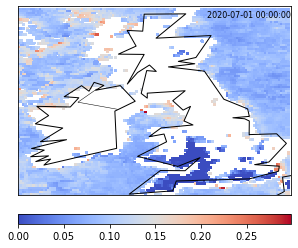

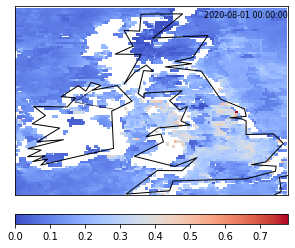

In [252]:
writer = PillowWriter(fps=30)  
ani.save("demo.gif", writer=writer) 

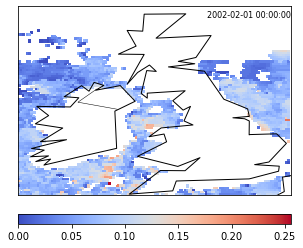

In [223]:
update(0)

### Testing one month of data

In [13]:
lons = np.arange(-180, 180, 0.1)
lats = np.arange(-90, 90, 0.1)
lats = lats[::-1]

lon, lat = np.meshgrid(lons, lats)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app


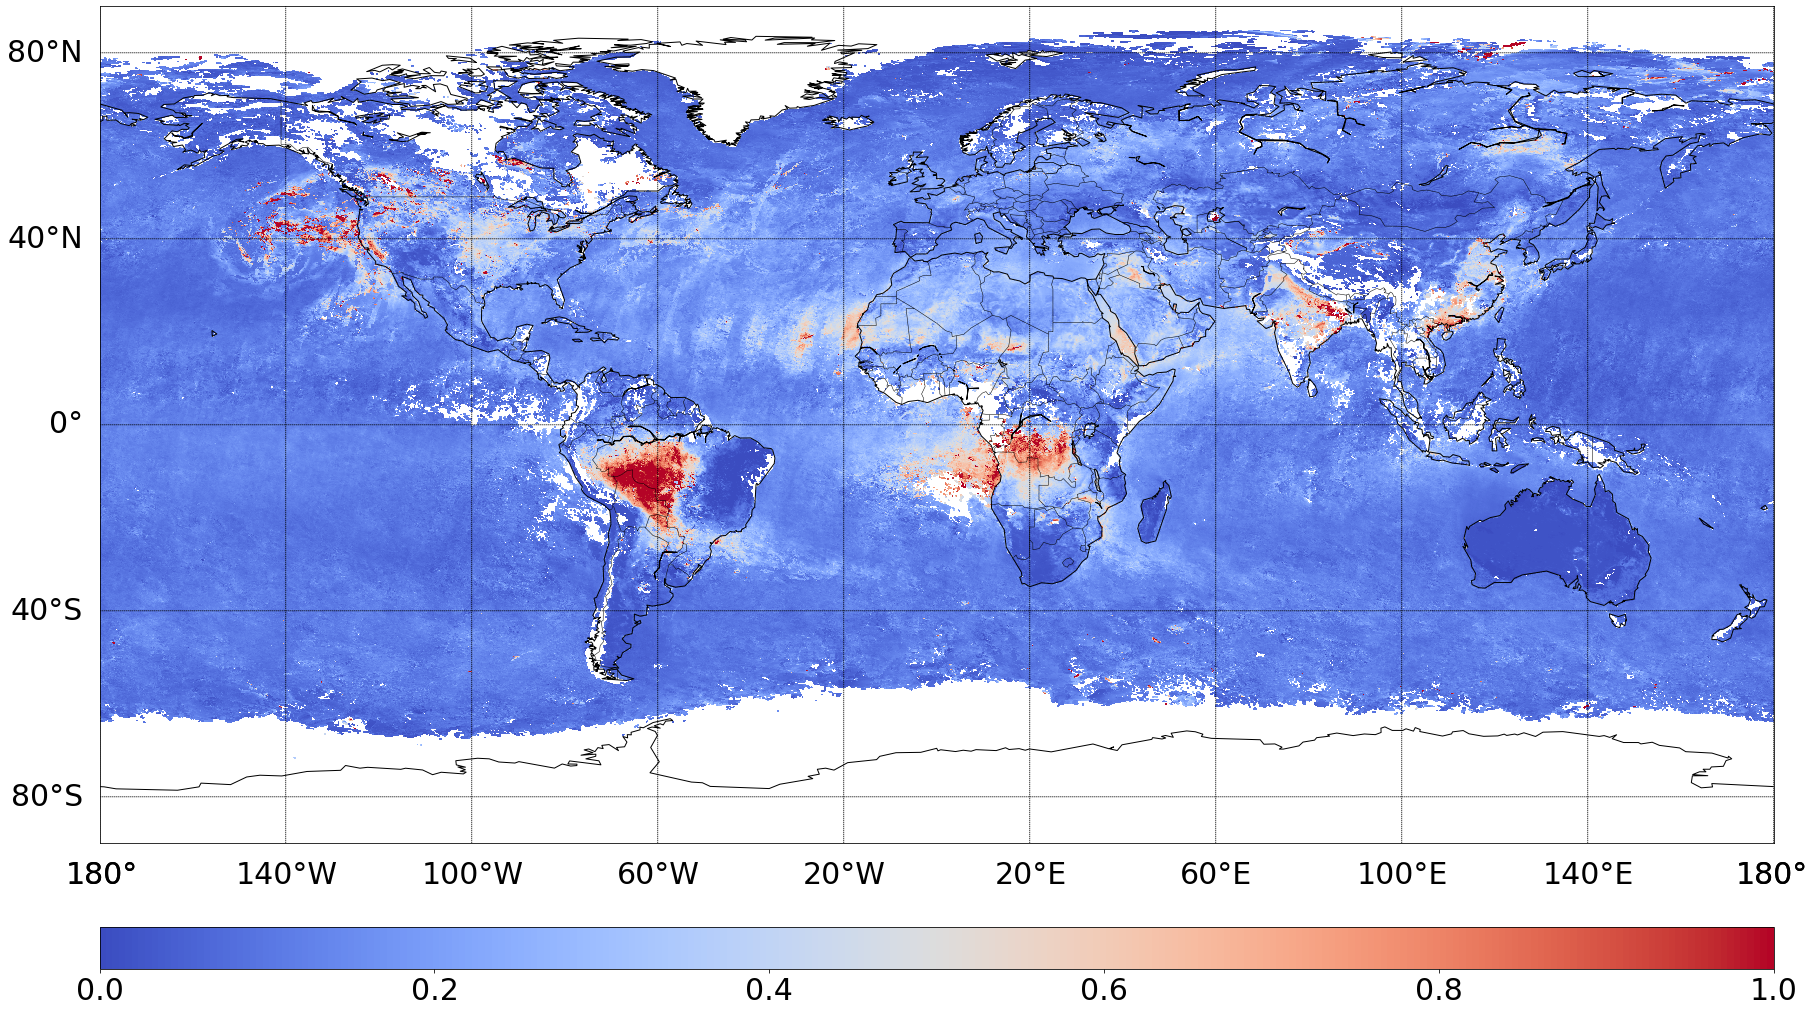

In [15]:
plt.figure(figsize = (30, 150))

m = Basemap()
xi, yi = m(lon, lat)
my_cmap = plt.get_cmap('coolwarm')

cs = m.pcolormesh(xi, yi, data_sep_, cmap = my_cmap)

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 40.), labels=[1,0,0,0], fontsize=30);
m.drawmeridians(np.arange(-180., 181., 40.), labels=[0,0,0,1], fontsize=30);

# Adding coast and country lines
m.drawcoastlines()
m.drawcountries()

cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.ax.tick_params(labelsize=30)
#cbar.set_label('count', fontsize=20)

plt.show()

### Zoom in on the UK

#### UK Latitudes, Longitudes

In [16]:
lon_0 = -11
lon_1 = 2
lat_0 = 50
lat_1 = 59

#### Define Coordinates with respect to these images

In [17]:
x0 = 1800 + lon_0*10
x1 = 1800 + lon_1*10
y0 = 900 - lat_1*10
y1 = 900 - lat_0*10

In [18]:
lons_uk = np.arange(lon_0, lon_1, 0.1)
lats_uk = np.arange(lat_0, lat_1, 0.1)
lats_uk = lats_uk[::-1]

lon_uk, lat_uk = np.meshgrid(lons_uk, lats_uk)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app


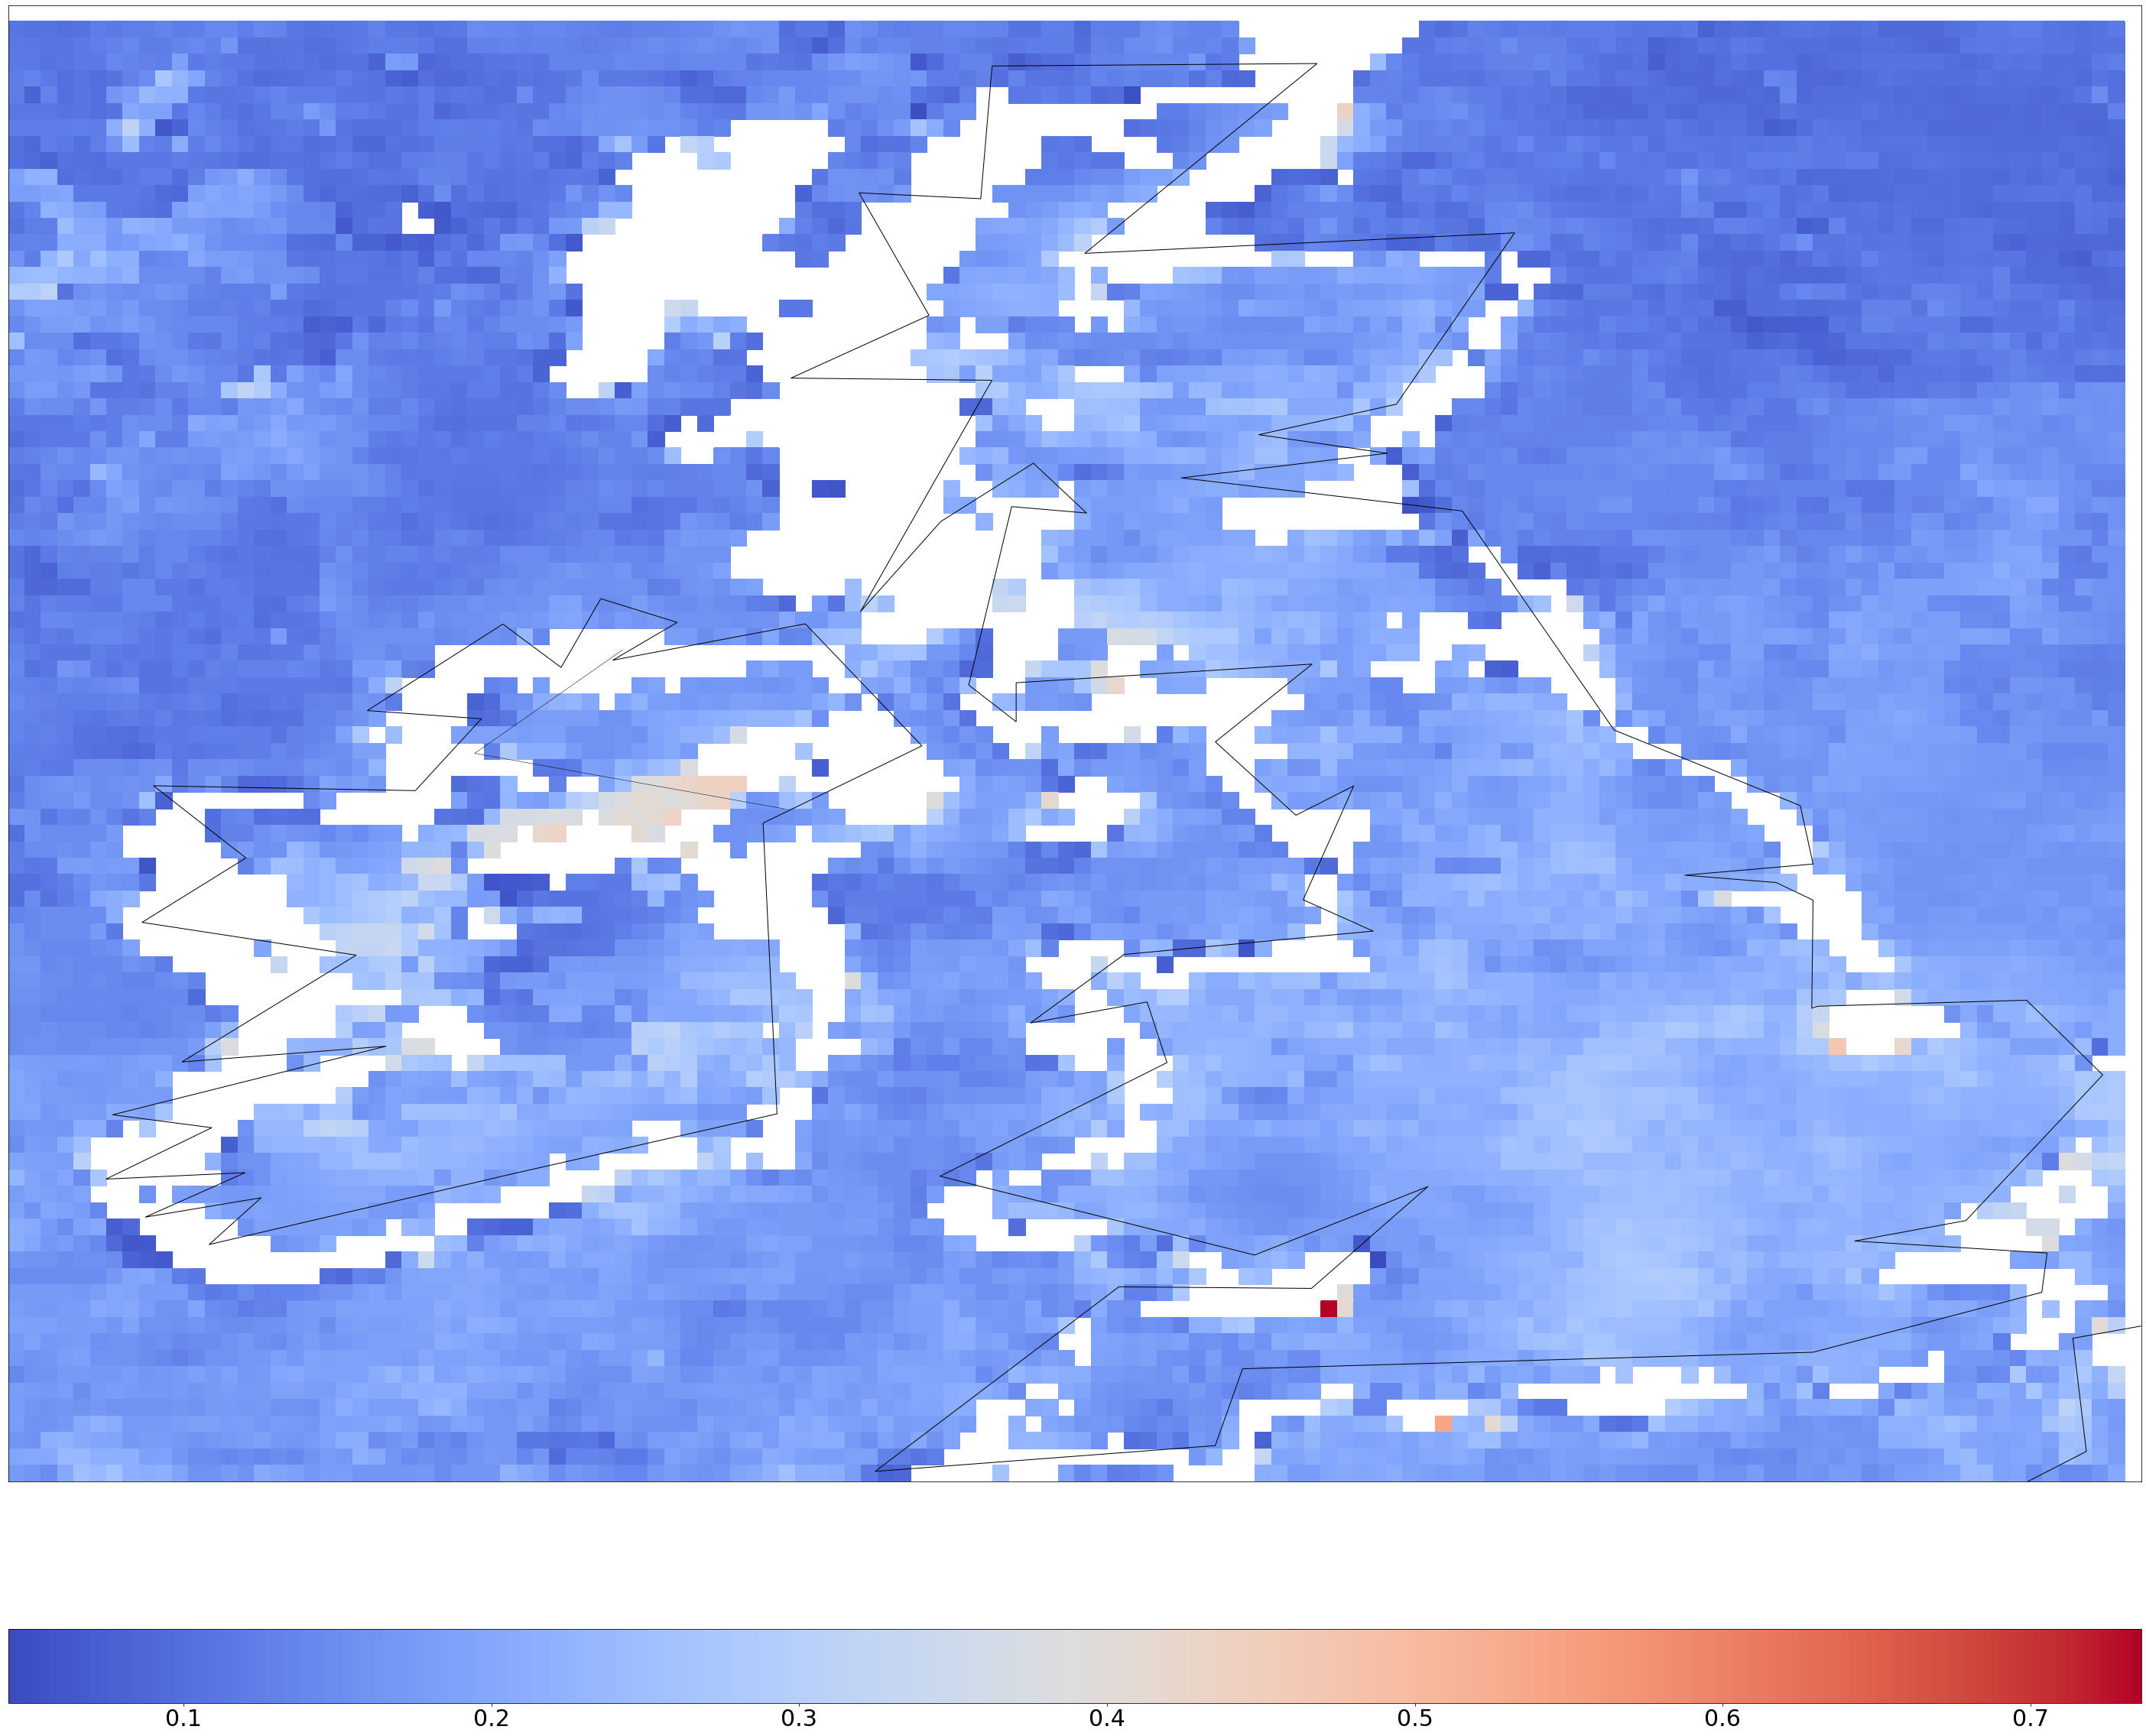

In [19]:
plt.figure(figsize = (50, 250))

m = Basemap(llcrnrlat=lat_0, urcrnrlat=lat_1, llcrnrlon=lon_0, urcrnrlon=lon_1)
xi, yi = m(lon_uk, lat_uk)

my_cmap = plt.get_cmap('coolwarm')

cs = m.pcolor(xi, yi, data_sep_[y0:y1,x0:x1], cmap = my_cmap)

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 40.), labels=[1,0,0,0], fontsize=30);
m.drawmeridians(np.arange(-180., 181., 40.), labels=[0,0,0,1], fontsize=30);

m.drawcoastlines()
m.drawcountries()

cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.ax.tick_params(labelsize=30)
#cbar.set_label('count', fontsize=20)

plt.show()

### Cumulative AOD

#### Sum over all values across the UK

In [65]:
np.nansum(data_new[y0:y1,x0:x1])/np.count_nonzero(~np.isnan(data_new[y0:y1,x0:x1]))

0.17077965756216879

In [66]:
np.nansum(data_new[y0:y1,x0:x1])

1675.69

#### Monthly trend

In [30]:
months = [6, 7, 8, 9]
AOD = []

In [31]:
for data_month in data_list:
    AOD_sum = np.nansum(data_month[y0:y1,x0:x1])/np.count_nonzero(~np.isnan(data_month[y0:y1,x0:x1]))
    AOD.append(AOD_sum)

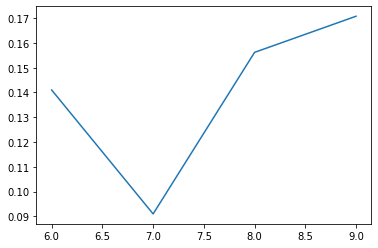

In [32]:
plt.plot(months, AOD)